# Assignment 4 - Posterior Predictive Checks
## Oscar Engelbrektson
## CS146, Prof. Scheffler, Fall 2019

The key assumption of the non-hierarchical model is that the probability of success in each of the medical trials is identical. In this assignment, I perform a posterior predictive check to check how well the data generated from the model captures relevant characteristics, as defined the test statistic below. I find that the modelling assumption is not appropriate, as it is highly improbable (p-value=0.008) that the variance in success rate between studies be as large as it is in the real data if it had been generated using our model. 

### Load prereqs, data and the posterior derived in session 8.1

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [58]:
#Data for the control group for each of the medical trials
#format: [#improved patients, total#patients]
data = np.array([[4, 10],
                [11, 18],
                [0, 10],
                [12, 29],
                [9, 15],
                [21, 39]])

#Posterior distribution for model
posterior = sts.beta(a=58, b=65)

## Defining a test statistic

Central to whether it is appropriate to assume that all studies can be modeled as draws from a binomial distributon with the same p is whether it captures the variation in success rate between studies. We design a test statistic to compute the variance in success rate between six studies. This test statistic will be applied to both the real data and replicated data from the posterior predictive distribution of our model.

In [40]:
def test_statistic(data):
    '''
    Takes input 6x2 matrix where each row contains represents a study
    and columns are [improved, total].
    Returns variance in improvement rate accross the 6 studies 
    '''
    return np.var([data[i][0]/data[i][1] for i in range(6)])

In [62]:
real_variance = test_statistic(data)

## Posterior predictive check

Process for performing the posterior predictive check:
1. Generate a sample p from the posterior distribution
2. Generate replicated data for each of the studies, using the posterior predictive distribution Binomial(n_i, p), where n_i is the number of patients in study i ∈ [0, 5] (one for each study). This yields a 6x2 matrix with the same number of patients in each study, i.e. the second column is identical to that of the real data, but where the number of successes is simulated using p from a sample of the posterior.
3. Compute test statistic on the data of the 6 replicated studies.
4. Repeat 10000 times and record the test statistic each time.

In [63]:
replicated_variance = []
for i in range(10000):
    sample_p = posterior.rvs()
    replicated_studies = [(sts.binom(data[i][1], sample_p).rvs(), data[i][1]) for i in range(6)]
    replicated_variance.append(test_statistic(replicated_studies))

In [65]:
#Computing the p-value by calculating the proportion of times the 
#Test statistic for the replicated data is more higher than that of the real data
print("The p-value for the test statistic of the real data is %0.3f"
     % np.mean(replicated_variance > real_variance))

The p-value for the test statistic of the real data is 0.008


## Visualizing the results

We plot the a histogram of the test statistic for each of the 10000 replicated datasets. The red vertical line replresents the value of the test-statistic for the real dataset. The test-statistic for the real dataset is far in the right tail of the data, meaning it is extreme relative to the distribution of test statistics for the replicated datasets.

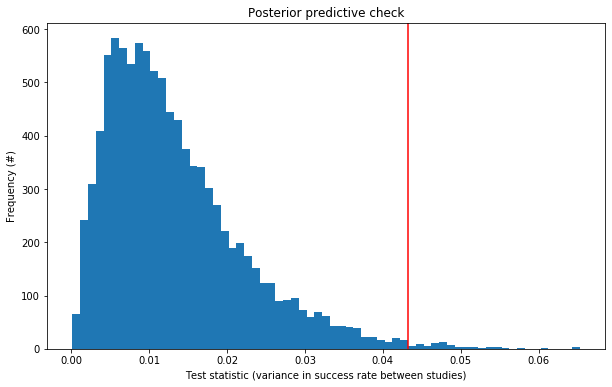

In [66]:
plt.figure(figsize=(10, 6))
plt.hist(replicated_variance, bins="auto")
plt.axvline(x=real_variance, color="r")
plt.title("Posterior predictive check")
plt.ylabel("Frequency (#)")
plt.xlabel("Test statistic (variance in success rate between studies)")
plt.show()

We can interpret this as there being a 0.008 probability of seeing data with variance as large as the real data, if it was generated with this model. Simply put, the non-hierarchical model does not explain the control group data well.